In [2]:
# Importing relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

In [2]:
# Importing the data and preprocessing

raw_csv_data = pd.read_csv("Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace = True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method = "ffill")

In [3]:
df_comp['market_value'] = df_comp.ftse

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

Text(0.5, 1.0, 'ACF for prices')

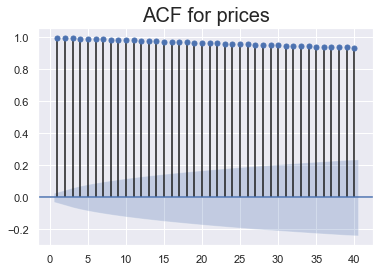

In [5]:
# The ACF
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for prices", size = 20)


Text(0.5, 1.0, 'PACF for prices')

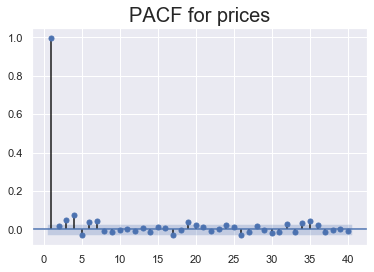

In [6]:
# The PACF
sgt.plot_pacf(df.market_value, zero = False, lags = 40, alpha = 0.05, method= ('ols'))
plt.title("PACF for prices", size = 20)


In [7]:
# The AR(1) model 
model_ar = ARMA(df.market_value, order = (1,0))
results_ar = model_ar.fit()

In [8]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.598
Method:                       css-mle   S.D. of innovations             59.258
Date:                Tue, 23 Jun 2020   AIC                          55251.195
Time:                        10:56:08   BIC                          55270.759
Sample:                    01-07-1994   HQIC                         55258.051
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5047.7164    486.707     10.371      0.000    4093.789    6001.644
ar.L1.market_value     0.9985      0.001   1298.887      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

In [9]:
# The higher lag model 
# also AR(2) model, considering the period for 2 lags

model_ar2 = ARMA(df.market_value, order = (2,0))
results_ar2 = model_ar2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.866
Method:                       css-mle   S.D. of innovations             59.249
Date:                Tue, 23 Jun 2020   AIC                          55251.732
Time:                        10:56:08   BIC                          55277.817
Sample:                    01-07-1994   HQIC                         55260.872
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5051.0670    494.464     10.215      0.000    4081.936    6020.198
ar.L1.market_value     0.9814      0.014     69.595      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4668           +0.0000j           58.4668            0.5000
-----------------------------------------------------------------------------
"""

In [11]:
# The higher lag model 
# also AR(3) model, considering the period for 3 lags

model_ar3 = ARMA(df.market_value, order = (3,0))
results_ar3 = model_ar3.fit()
results_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27615.871
Method:                       css-mle   S.D. of innovations             59.178
Date:                Tue, 23 Jun 2020   AIC                          55241.742
Time:                        10:58:01   BIC                          55274.349
Sample:                    01-07-1994   HQIC                         55253.168
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    520.394      9.780      0.000    4069.688    6109.594
ar.L1.market_value     0.9806      0.014     69.619      0.000       0.953       1.008
ar.L2.market_value    -0.0309      0.020     -1.563      0.118      -0.070       0.008
ar.L3.market_value     0.0489      0.014      3.466      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           -0.0000j            1.0013           -0.0000
AR.2           -0.1850           -4.5161j            4.5199           -0.2565
AR.3           -0.1850           +4.5161j            4.5199            0.2565
-----------------------------------------------------------------------------
"""

In [16]:
# The LLR test

def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [17]:
# The higher lag model 
# also AR(4) model, considering the period for 4 lags

model_ar4 = ARMA(df.market_value, order = (4,0))
results_ar4 = model_ar4.fit()
print(results_ar4.summary())
print("LLR test p value : " + str(LLR_test(model_ar3, model_ar4)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Tue, 23 Jun 2020   AIC                          55217.130
Time:                        11:04:47   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    559.981      9.089      0.000    3992.098    6187.184
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value  

In [18]:
# The higher lag model 
# also AR(5) model, considering the period for 5 lags

model_ar5 = ARMA(df.market_value, order = (5,0))
results_ar5 = model_ar5.fit()
print(results_ar5.summary())
print("LLR test p value : " + str(LLR_test(model_ar4, model_ar5)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 0)   Log Likelihood              -27600.348
Method:                       css-mle   S.D. of innovations             58.996
Date:                Tue, 23 Jun 2020   AIC                          55214.697
Time:                        11:05:21   BIC                          55260.346
Sample:                    01-07-1994   HQIC                         55230.693
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6416    543.563      9.363      0.000    4024.278    6155.005
ar.L1.market_value     0.9791      0.014     69.481      0.000       0.952       1.007
ar.L2.market_value  

In [19]:
# The higher lag model 
# also AR(6) model, considering the period for 6 lags

model_ar6 = ARMA(df.market_value, order = (6,0))
results_ar6 = model_ar6.fit()
print(results_ar6.summary())
print("LLR test p value : " + str(LLR_test(model_ar5, model_ar6)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 0)   Log Likelihood              -27596.474
Method:                       css-mle   S.D. of innovations             58.950
Date:                Tue, 23 Jun 2020   AIC                          55208.947
Time:                        11:05:48   BIC                          55261.118
Sample:                    01-07-1994   HQIC                         55227.229
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6414    565.282      9.004      0.000    3981.710    6197.573
ar.L1.market_value     0.9803      0.014     69.604      0.000       0.953       1.008
ar.L2.market_value  

In [20]:
# The higher lag model 
# also AR(7) model, considering the period for 7 lags

model_ar7 = ARMA(df.market_value, order = (7,0))
results_ar7 = model_ar7.fit()
print(results_ar7.summary())
print("LLR test p value : " + str(LLR_test(model_ar6, model_ar7)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -27591.900
Method:                       css-mle   S.D. of innovations             58.896
Date:                Tue, 23 Jun 2020   AIC                          55201.799
Time:                        11:06:17   BIC                          55260.492
Sample:                    01-07-1994   HQIC                         55222.366
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6412    589.582      8.633      0.000    3934.081    6245.201
ar.L1.market_value     0.9786      0.014     69.518      0.000       0.951       1.006
ar.L2.market_value  

In [21]:
# The higher lag model 
# also AR(8) model, considering the period for 8 lags

model_ar8 = ARMA(df.market_value, order = (8,0))
results_ar8 = model_ar8.fit()
print(results_ar8.summary())
print("LLR test p value : " + str(LLR_test(model_ar7, model_ar8)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(8, 0)   Log Likelihood              -27591.733
Method:                       css-mle   S.D. of innovations             58.894
Date:                Tue, 23 Jun 2020   AIC                          55203.466
Time:                        11:06:51   BIC                          55268.680
Sample:                    01-07-1994   HQIC                         55226.318
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5041.9316    583.101      8.647      0.000    3899.075    6184.788
ar.L1.market_value     0.9790      0.014     69.476      0.000       0.951       1.007
ar.L2.market_value  

In [23]:
## This shows that the 8 lags dont show much significance, hence we can stick oto less complex models.

In [22]:
## At last let us compare the LLR for the dataset and it's 7th lagged version with degrees of freedom to be 6

print("LLR test : " + str(LLR_test(model_ar, model_ar7, DF=6)))

LLR test : 0.0


In [ ]:
## The complex model above yielded a significantly greater loglikelihood, so we decide to stick with it.3

## Converting into Stationary process

In [25]:
## As we understood that the AR model works better for a stationary process, let us check if our dataset is
## stationary or not using the adfuller test

import statsmodels.tsa.stattools as sts 
sts.adfuller(df.market_value)

(-1.9041551418836873,
 0.330108932770283,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

In [26]:
## the above test shows that the p value is insignificant, and hence we can conlcude that the data comes from a 
## non-stationary process.


## Using Returns

In [27]:
df['returns'] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]
sts.adfuller(df.returns)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(-12.770265719497228,
 7.798058336038662e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.767245697501)

In [28]:
## We can observe that the p value is far less compared to the 5% significant value, hence we can confidently state
## that the data comes from a stationary process.

## ACF & PACF for Returns

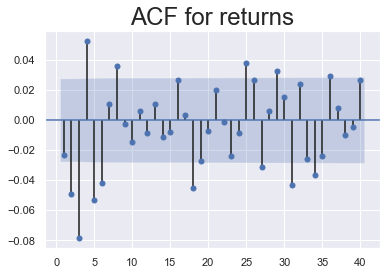

In [29]:
sgt.plot_acf(df.returns, lags = 40, zero = False)
plt.title("ACF for returns", size = 24)
plt.show()

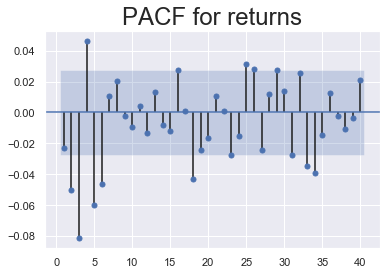

In [31]:
sgt.plot_pacf(df.returns, lags = 40, zero = False, method = ('ols'))
plt.title("PACF for returns", size = 24)
plt.show()

## AR(1) for Returns

In [37]:
# The single lag model 
# also AR(1) model, considering the period for 1 lags


model_ret_ar1 = ARMA(df.returns, order = (1,0))
results_ret_ar1 = model_ret_ar1.fit()
results_ret_ar1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Tue, 23 Jun 2020   AIC                          15865.497
Time:                        15:43:09   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4386           +0.0000j           43.4386            0.5000
-----------------------------------------------------------------------------
"""

## Higher lag AR models for Returns

In [38]:
# The higher lag model 
# also AR(2) model, considering the period for 2 lags


model_ret_ar2 = ARMA(df.returns, order = (2,0))
results_ret_ar2 = model_ret_ar2.fit()
print(results_ret_ar2.summary())
print(LLR_test(model_ret_ar1, model_ret_ar2))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7923.456
Method:                       css-mle   S.D. of innovations              1.173
Date:                Tue, 23 Jun 2020   AIC                          15854.911
Time:                        15:43:36   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.220      0.222      -0.011       0.049
ar.L1.returns    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.returns    -0.0500      0.014     

In [39]:
# The higher lag model 
# also AR(3) model, considering the period for 3 lags

model_ret_ar3 = ARMA(df.returns, order = (3,0))
results_ret_ar3 = model_ret_ar3.fit()
print(results_ret_ar3.summary())
print(LLR_test(model_ret_ar2, model_ret_ar3))


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -7906.738
Method:                       css-mle   S.D. of innovations              1.169
Date:                Tue, 23 Jun 2020   AIC                          15823.477
Time:                        15:44:13   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.330      0.184      -0.009       0.047
ar.L1.returns    -0.0283      0.014     -2.011      0.044      -0.056      -0.001
ar.L2.returns    -0.0521      0.014     

In [40]:
# The higher lag model 
# also AR(4) model, considering the period for 4 lags

model_ret_ar4 = ARMA(df.returns, order = (4,0))
results_ret_ar4 = model_ret_ar4.fit()
print(results_ret_ar4.summary())
print(LLR_test(model_ret_ar3, model_ret_ar4))


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(4, 0)   Log Likelihood               -7901.330
Method:                       css-mle   S.D. of innovations              1.168
Date:                Tue, 23 Jun 2020   AIC                          15814.661
Time:                        15:47:09   BIC                          15853.788
Sample:                    01-10-1994   HQIC                         15828.371
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.267      0.205      -0.010       0.048
ar.L1.returns    -0.0245      0.014     -1.739      0.082      -0.052       0.003
ar.L2.returns    -0.0496      0.014     

In [41]:
# The higher lag model 
# also AR(5) model, considering the period for 5 lags

model_ret_ar5 = ARMA(df.returns, order = (5,0))
results_ret_ar5 = model_ret_ar5.fit()
print(results_ret_ar5.summary())
print(LLR_test(model_ret_ar4, model_ret_ar5))


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 0)   Log Likelihood               -7892.390
Method:                       css-mle   S.D. of innovations              1.166
Date:                Tue, 23 Jun 2020   AIC                          15798.779
Time:                        15:47:34   BIC                          15844.428
Sample:                    01-10-1994   HQIC                         15814.775
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.348      0.178      -0.009       0.046
ar.L1.returns    -0.0217      0.014     -1.544      0.123      -0.049       0.006
ar.L2.returns    -0.0544      0.014     

In [42]:
# The higher lag model 
# also AR(6) model, considering the period for 6 lags

model_ret_ar6 = ARMA(df.returns, order = (6,0))
results_ret_ar6 = model_ret_ar6.fit()
print(results_ret_ar6.summary())
print(LLR_test(model_ret_ar5, model_ret_ar6))


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood               -7886.945
Method:                       css-mle   S.D. of innovations              1.164
Date:                Tue, 23 Jun 2020   AIC                          15789.890
Time:                        15:48:01   BIC                          15842.059
Sample:                    01-10-1994   HQIC                         15808.170
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.414      0.157      -0.007       0.045
ar.L1.returns    -0.0245      0.014     -1.740      0.082      -0.052       0.003
ar.L2.returns    -0.0523      0.014     

In [43]:
# The higher lag model 
# also AR(7) model, considering the period for 7 lags

model_ret_ar7 = ARMA(df.returns, order = (7,0))
results_ret_ar7 = model_ret_ar7.fit()
print(results_ret_ar7.summary())
print(LLR_test(model_ret_ar6, model_ret_ar7))


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -7886.647
Method:                       css-mle   S.D. of innovations              1.164
Date:                Tue, 23 Jun 2020   AIC                          15791.294
Time:                        15:48:28   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.399      0.162      -0.008       0.045
ar.L1.returns    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.returns    -0.0517      0.014     

## Normalising values

In [44]:
benchmark = df.market_value.iloc[0]
df['norm'] = df.market_value.div(benchmark).mul(100)
sts.adfuller(df.norm)


(-1.8928710132672337,
 0.3354222074330079,
 6,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 19553.90073102193)

In [45]:
benchmark_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(benchmark_ret).mul(100)
sts.adfuller(df.norm_ret)

(-12.770265719497225,
 7.798058336038833e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 80114.49116124898)